第一个Langgraph
****
- 基本控制:串行控制
- 基本控制:分支控制
- 基本控制:条件与循环
- 精细控制:图的运行时配置
- 精细控制:map-reduce


#### 第一个Langgraph

In [5]:
pip install -U langgraph

Note: you may need to restart the kernel to use updated packages.


##### 定义state
- TypedDict: 属于Python标准库typing模块的一部分，仅提供静态类型检查，运行时不执行验证。
- Pydantic: 第三方库，需要单独安装，提供运行时数据验证和序列化功能

In [6]:
from langchain_core.messages import AnyMessage
from typing_extensions import TypedDict

# 定义节点通讯消息格式

class State(TypedDict):
    """状态消息格式"""
    message: list[AnyMessage]
    extra_field: int

##### 定义节点

In [7]:
from langchain_core.messages import AIMessage

def node(state: State):
    """模拟节点通讯"""
    message = state["message"]
    new_message = AIMessage("你好我是节点1")
    
    return {
        "message": message + [new_message],
        "extra_field": 1,
    }

##### 创建图

- 包含一个节点
- 使用state 通信

In [8]:
from langgraph.graph import StateGraph

graph = StateGraph(State)
graph.add_node("node", node)
graph.set_entry_point("node")
graph_builder = graph.compile()

##### 查看节点图结构

Mermaid是一种基于文本的图表和可视化工具,它允许用户通过简单的文本语法来创建复杂的图表和流程图。它特别适合开发者、文档编
库或网页中嵌入可视化内容。

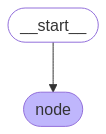

In [9]:
from IPython.display import Image, display

display(Image(graph_builder.get_graph().draw_mermaid_png()))